In [9]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin

In [10]:
start = dt.date(2012,1,1)
end = dt.date(2022,12,31)
ticker = 'AAPL'

df = yfin.download(ticker, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500196,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567370,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839728,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400


In [11]:
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.500196   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.567370   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.706894   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.839728   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.819361   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.658981   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.831772   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.847855   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.412415   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.731918   

               Volume  
Date         

In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,77034200


In [13]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500196,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567370,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839728,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400


In [14]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


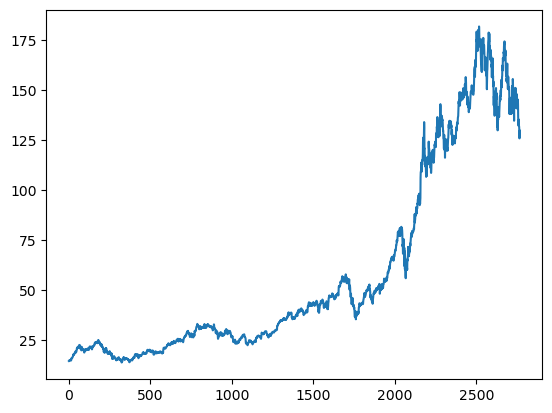

In [15]:
plt.plot(df.Close)

In [16]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2763,130.919998,132.419998,129.639999,131.860001,63814900
2764,131.380005,131.410004,128.720001,130.029999,69007800
2765,129.669998,131.029999,125.870003,126.040001,85438400
2766,127.989998,130.479996,127.730003,129.610001,75703700


In [17]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    150.515600
2764    150.157800
2765    149.764699
2766    149.412100
2767    149.062199
Name: Close, Length: 2768, dtype: float64

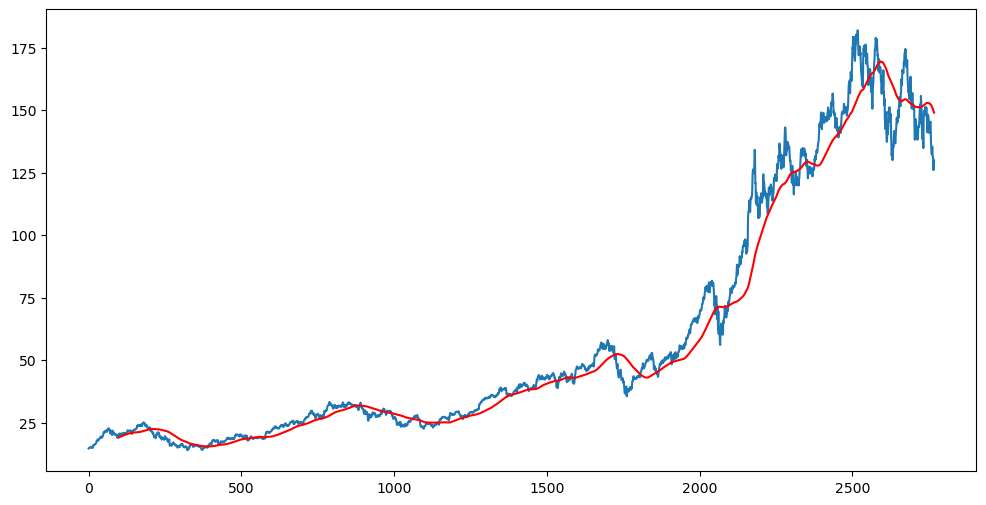

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [19]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2763    152.1331
2764    152.0096
2765    151.8867
2766    151.7593
2767    151.6110
Name: Close, Length: 2768, dtype: float64

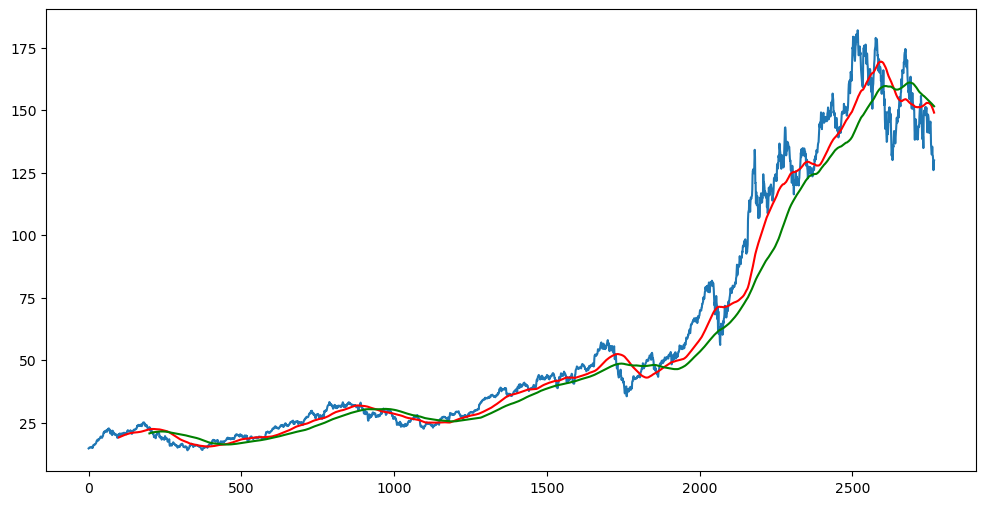

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [21]:
df.shape


(2768, 5)

In [22]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [23]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [24]:
data_testing.head()

,Close
1937,54.974998
1938,55.174999
1939,55.692501
1940,55.240002
1941,54.432499


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.95189465],
       [0.94905826],
       [0.92443835]])

In [27]:
data_training_array.shape

(1937, 1)

In [28]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
# ML Model

In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
            input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 30s 273ms/step - loss: 0.0347
Epoch 2/50
58/58 [==============================] - 16s 275ms/step - loss: 0.0089
Epoch 3/50
58/58 [==============================] - 16s 279ms/step - loss: 0.0075
Epoch 4/50
58/58 [==============================] - 16s 270ms/step - loss: 0.0078
Epoch 5/50
58/58 [==============================] - 16s 267ms/step - loss: 0.0064
Epoch 6/50
58/58 [==============================] - 21s 371ms/step - loss: 0.0060
Epoch 7/50
58/58 [==============================] - 28s 480ms/step - loss: 0.0055
Epoch 8/50
58/58 [==============================] - 34s 592ms/step - loss: 0.0050
Epoch 9/50
58/58 [==============================] - 36s 615ms/step - loss: 0.0051
Epoch 10/50
58/58 [==============================] - 33s 573ms/step - loss: 0.0049
Epoch 11/50
58/58 [==============================] - 30s 517ms/step - loss: 0.0053
Epoch 12/50
58/58 [==============================] - 31s 526ms/step - loss: 0.0051
Epoch 13/50
5

In [34]:
model.save('prototype_keras_model.h5')

In [35]:
data_testing.head()

,Close
1937,54.974998
1938,55.174999
1939,55.692501
1940,55.240002
1941,54.432499


In [36]:
data_training.tail(100)

,Close
1837,51.790001
1838,51.320000
1839,51.075001
1840,51.152500
1841,50.167500
...,...
1932,53.542500
1933,54.174999
1934,55.897499
1935,55.772499


In [37]:
past_100_days = data_training.tail(100)

In [40]:
#final_df = pd.concat([past_100_days,data_testing])
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
final_df.head()

,Close
0,51.790001
1,51.320000
2,51.075001
3,51.152500
4,50.167500


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.06103761],
       [0.05764862],
       [0.05588204],
       [0.05644085],
       [0.04933842],
       [0.0670945 ],
       [0.06462486],
       [0.06931175],
       [0.06341709],
       [0.05328622],
       [0.05335832],
       [0.04942856],
       [0.04304718],
       [0.02238886],
       [0.02768865],
       [0.03176262],
       [0.0302484 ],
       [0.02830154],
       [0.0176479 ],
       [0.0239752 ],
       [0.01708908],
       [0.01146483],
       [0.010221  ],
       [0.00888703],
       [0.0073548 ],
       [0.00901323],
       [0.00319069],
       [0.        ],
       [0.01142877],
       [0.01665643],
       [0.02148754],
       [0.03037457],
       [0.03475502],
       [0.03877491],
       [0.03765728],
       [0.03758516],
       [0.03504345],
       [0.03711648],
       [0.04533655],
       [0.04429101],
       [0.04715724],
       [0.04593142],
       [0.0455709 ],
       [0.04014494],
       [0.04777013],
       [0.04766197],
       [0.04438114],
       [0.050

In [43]:
input_data.shape

(931, 1)

In [44]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [45]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [46]:
# Making Predictions

y_predicted = model.predict(x_test)

26/26 [==============================] - 14s 306ms/step


In [47]:
y_predicted.shape

(831, 1)

In [48]:
y_test

array([0.0840033 , 0.08544543, 0.08917692, 0.08591413, 0.08009156,
       0.08187619, 0.08000143, 0.0860403 , 0.08398529, 0.08205647,
       0.09134009, 0.09245772, 0.08230884, 0.08566176, 0.09682012,
       0.09691026, 0.09211521, 0.09685618, 0.10237228, 0.11340449,
       0.11279157, 0.11180014, 0.1100876 , 0.11172801, 0.11376501,
       0.12115585, 0.12016441, 0.12596891, 0.12668998, 0.13209792,
       0.13655046, 0.1261672 , 0.12611312, 0.13602768, 0.14875439,
       0.15178282, 0.15111585, 0.15131411, 0.15526191, 0.15654183,
       0.16025528, 0.15982261, 0.16434727, 0.16104845, 0.1666727 ,
       0.16908823, 0.1676281 , 0.16203988, 0.15991277, 0.15949814,
       0.16777228, 0.1640228 , 0.17042218, 0.16935862, 0.16378845,
       0.155298  , 0.15942602, 0.16634818, 0.17559576, 0.16876377,
       0.1715759 , 0.17570392, 0.17694775, 0.18359952, 0.19208996,
       0.19308145, 0.19187366, 0.19237839, 0.19133288, 0.19955295,
       0.20003964, 0.21020659, 0.21000827, 0.21310883, 0.21694

In [49]:
y_predicted

array([[0.09668668],
       [0.09875204],
       [0.10087402],
       [0.10296969],
       [0.10494733],
       [0.10667312],
       [0.10806102],
       [0.10906109],
       [0.10972953],
       [0.11013938],
       [0.11034602],
       [0.11049321],
       [0.1107211 ],
       [0.11101589],
       [0.11135182],
       [0.11181259],
       [0.11247152],
       [0.11330733],
       [0.11430672],
       [0.11549653],
       [0.1169931 ],
       [0.11886297],
       [0.121088  ],
       [0.12356964],
       [0.12618816],
       [0.12883584],
       [0.13148634],
       [0.13410679],
       [0.13671145],
       [0.13930684],
       [0.14192924],
       [0.14463234],
       [0.14731659],
       [0.1498448 ],
       [0.15219699],
       [0.15451913],
       [0.1569773 ],
       [0.15966009],
       [0.16257262],
       [0.16569391],
       [0.16896883],
       [0.17233992],
       [0.17573252],
       [0.17907795],
       [0.18228452],
       [0.18530956],
       [0.18813819],
       [0.190

In [50]:
scaler.scale_

array([0.00721059])

In [51]:
scale_factor = 1/0.00721059
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

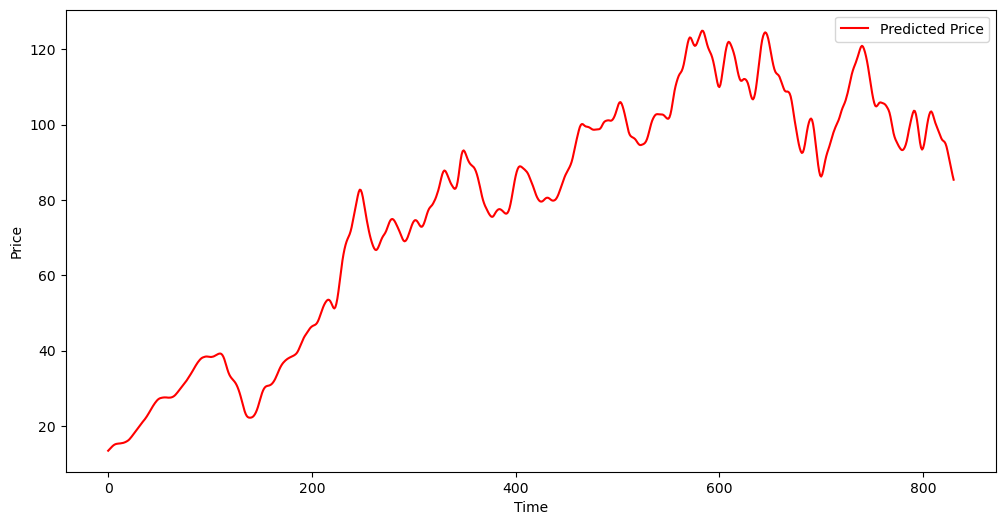

In [52]:
#Prediction Graph

plt.figure(figsize=(12,6))
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

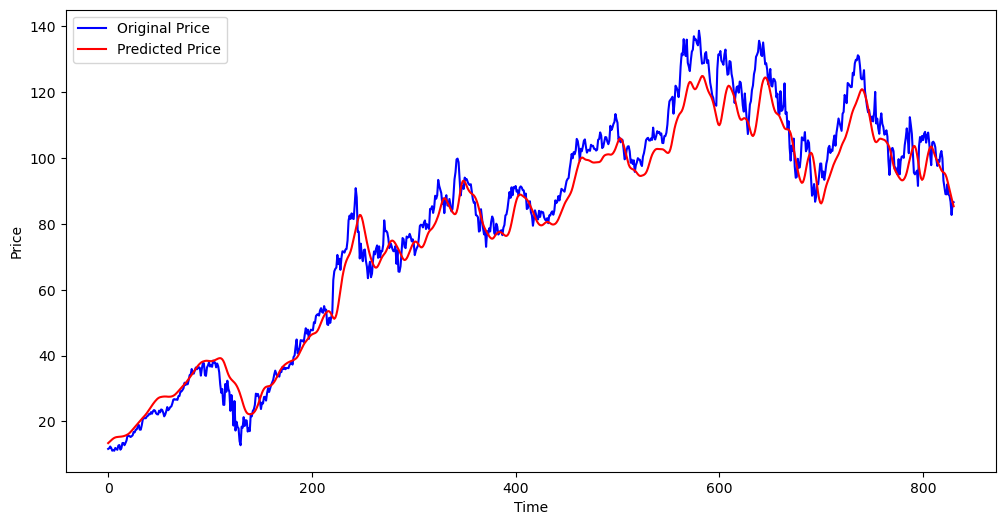

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()